In [67]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import os
import glob
import matplotlib.image as mpimg
from pathlib import Path

In [277]:
hug = glob.glob(os.path.join("Datasets", "**/*.png"), recursive=True)

width:   71
height:  76
channel: 4
width:   82
height:  87
channel: 4
width:   60
height:  81
channel: 4
width:   59
height:  80
channel: 4
width:   49
height:  75
channel: 4
width:   60
height:  70
channel: 4
width:   55
height:  77
channel: 4
width:   56
height:  61
channel: 4
width:   59
height:  70
channel: 4
width:   46
height:  75
channel: 4
width:   73
height:  77
channel: 4
width:   72
height:  66
channel: 4
width:   55
height:  65
channel: 4
width:   56
height:  72
channel: 4
width:   57
height:  74
channel: 4
width:   51
height:  64
channel: 4
width:   65
height:  88
channel: 4
width:   63
height:  72
channel: 4
width:   69
height:  75
channel: 4
width:   58
height:  72
channel: 4
width:   62
height:  73
channel: 4
width:   82
height:  85
channel: 4
width:   69
height:  75
channel: 4
width:   62
height:  74
channel: 4
width:   40
height:  54
channel: 4
width:   48
height:  75
channel: 4
width:   83
height:  73
channel: 4
width:   61
height:  74
channel: 4
width:   59
height: 

C:\Users\haslam2\AppData\Local\Temp\ipykernel_20276\1950937847.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


width:   59
height:  66
channel: 4
width:   69
height:  70
channel: 4
width:   50
height:  63
channel: 4
width:   68
height:  72
channel: 4
width:   55
height:  75
channel: 4
width:   81
height:  72
channel: 4
width:   72
height:  71
channel: 4
width:   71
height:  82
channel: 4
width:   60
height:  77
channel: 4
width:   68
height:  82
channel: 4
width:   64
height:  79
channel: 4
width:   61
height:  70
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1586
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   1024
height:  1668
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   1280
height:  1697
channel: 4
width:   800
height:  2171
channel: 4
width:   1280
height:  1697
channel

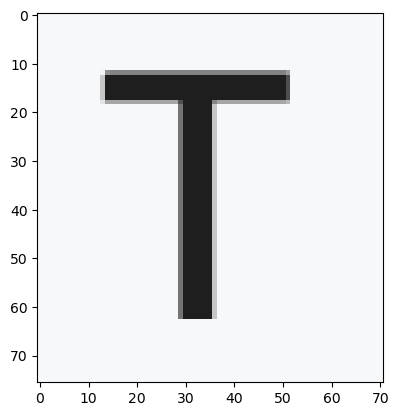

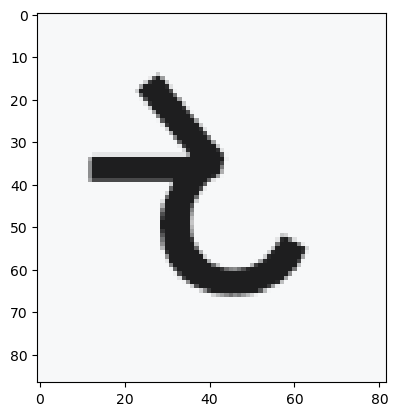

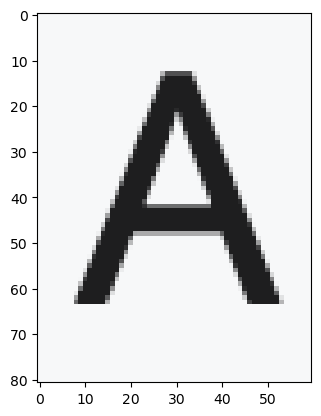

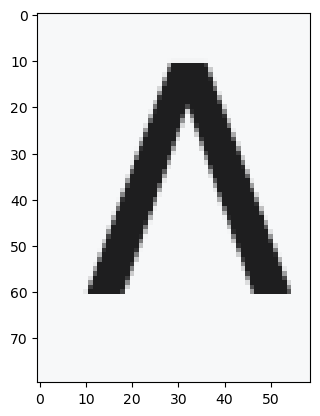

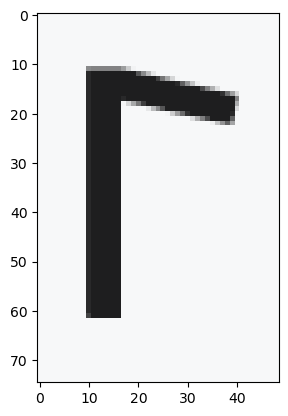

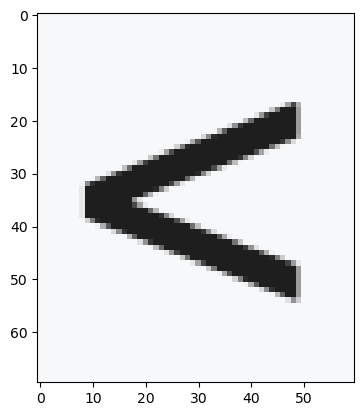

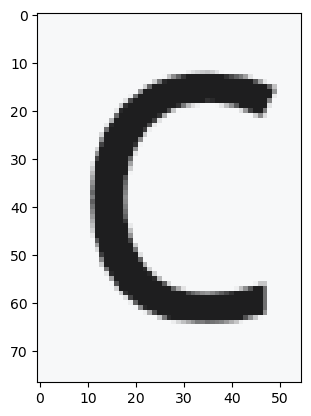

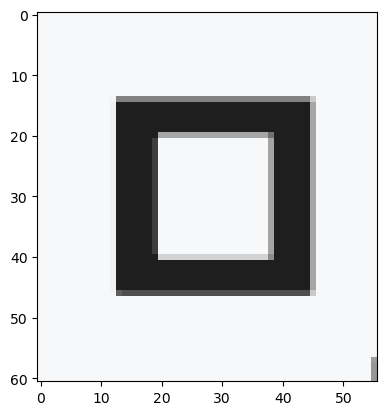

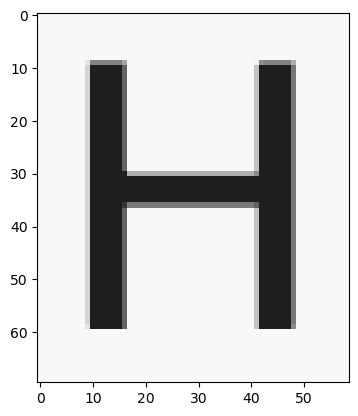

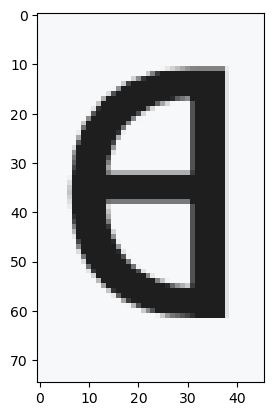

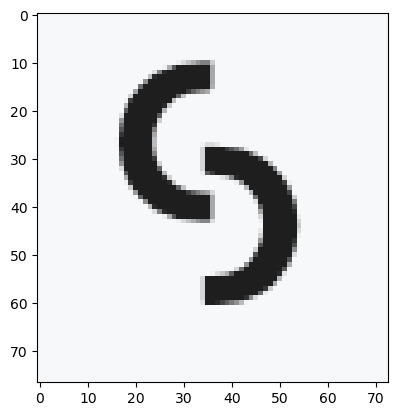

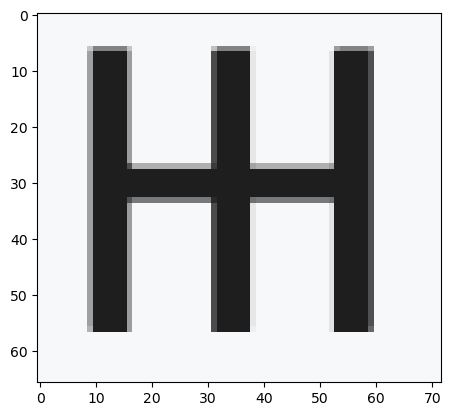

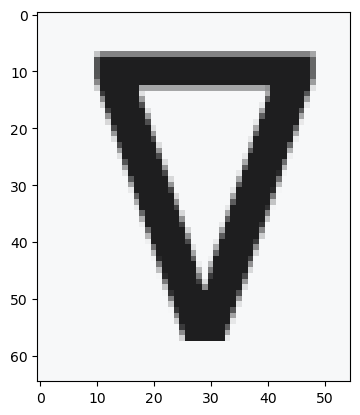

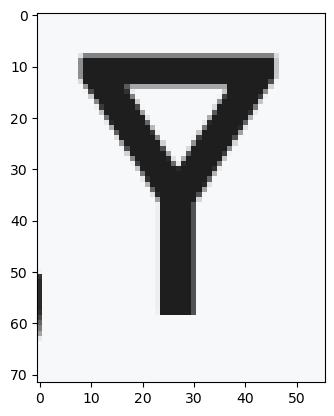

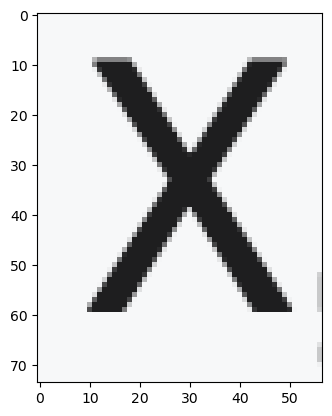

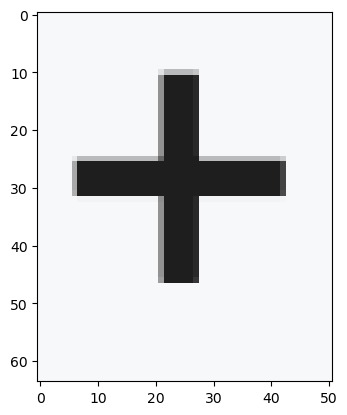

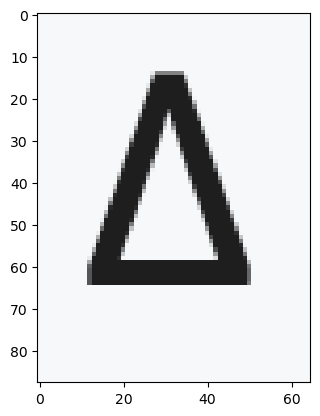

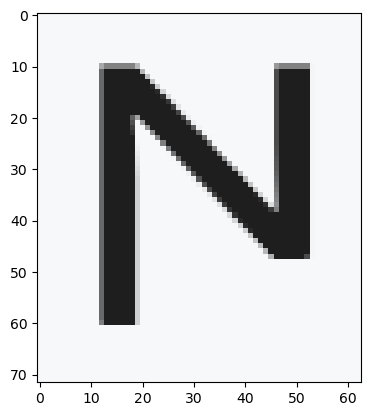

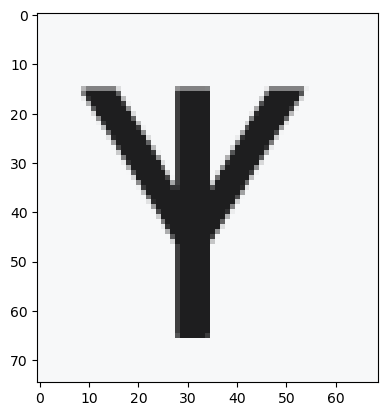

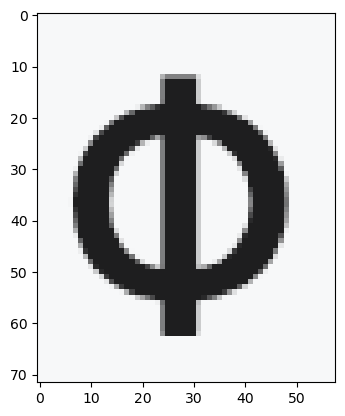

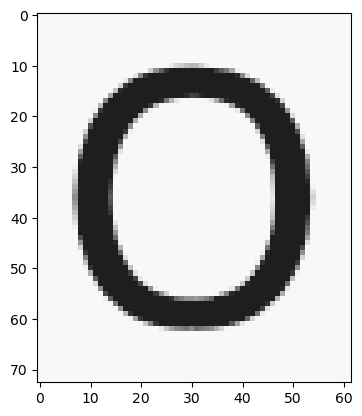

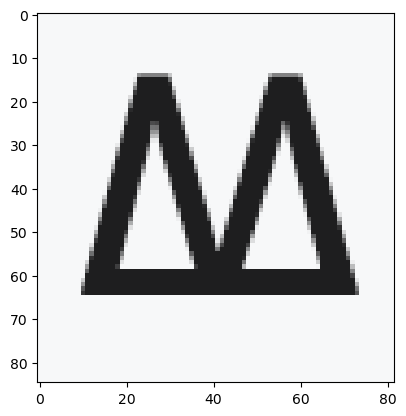

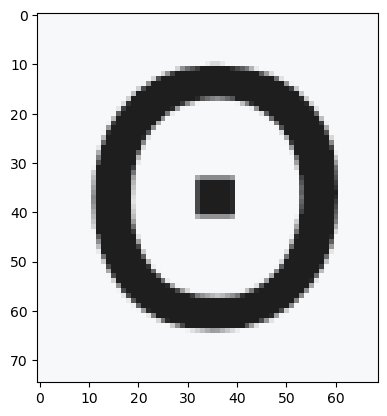

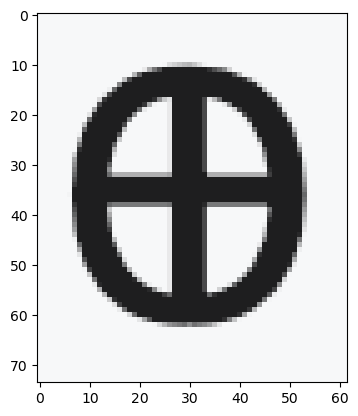

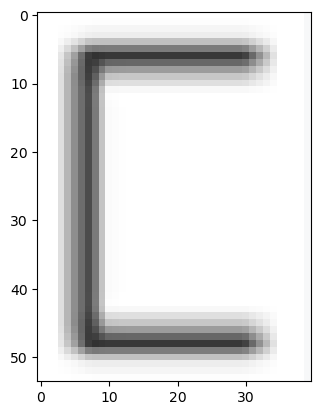

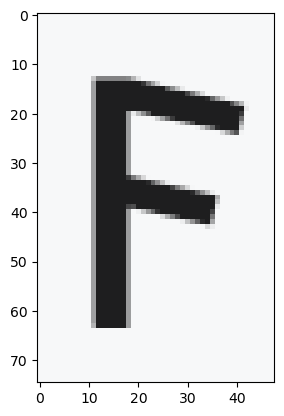

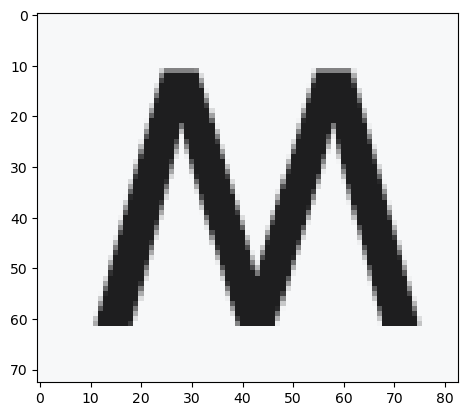

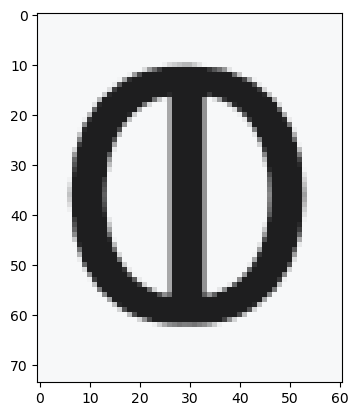

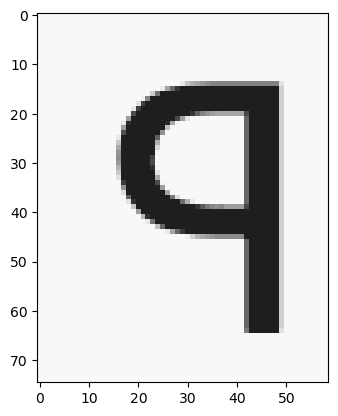

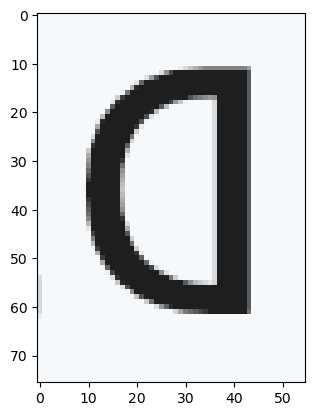

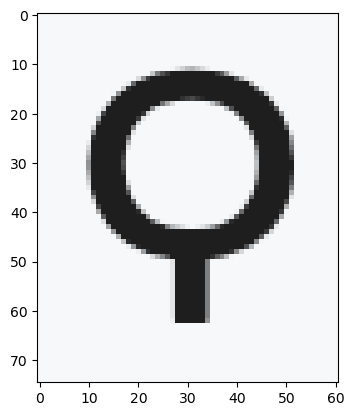

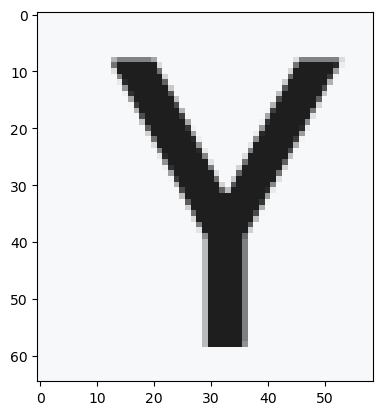

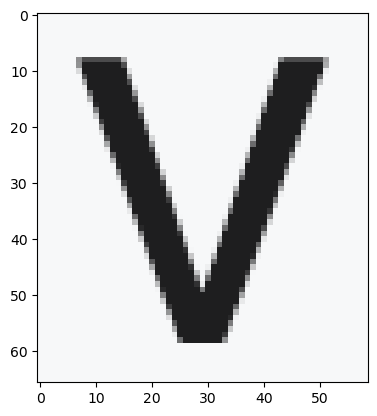

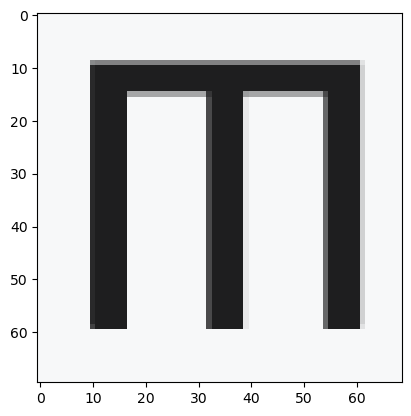

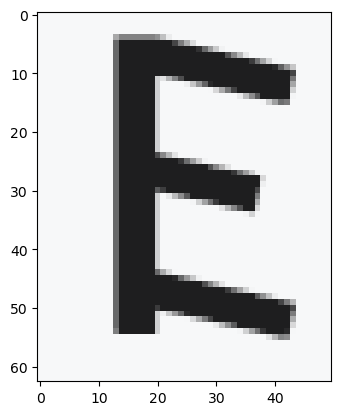

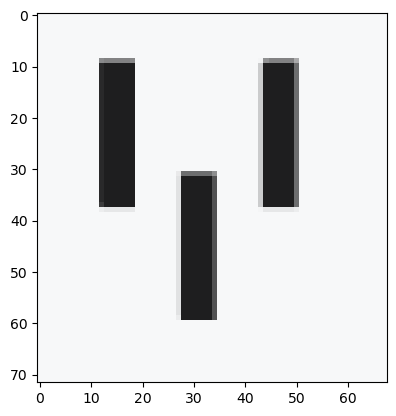

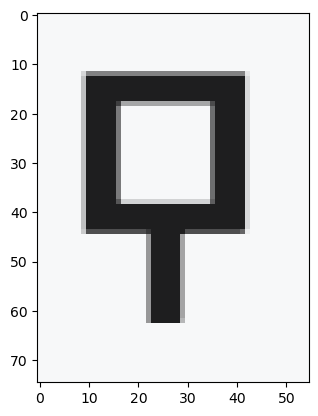

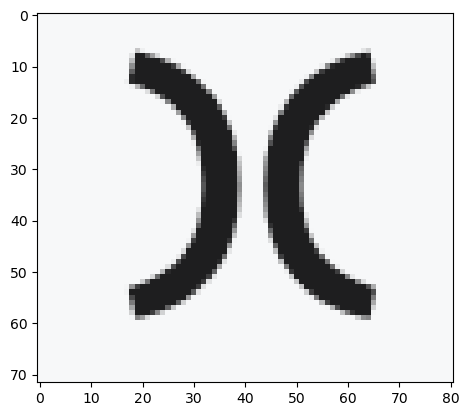

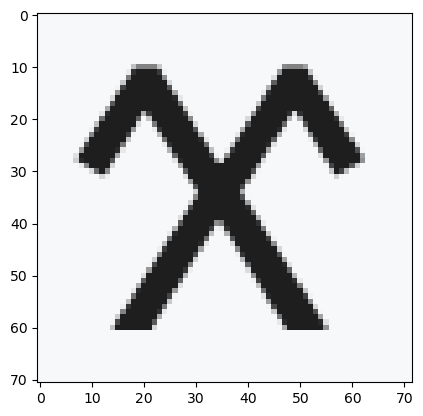

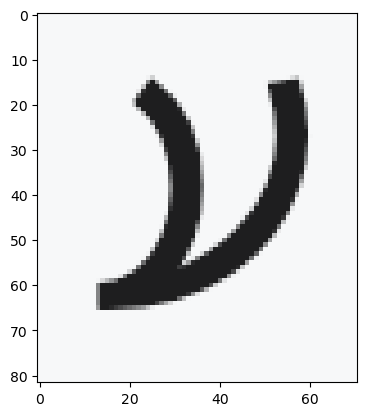

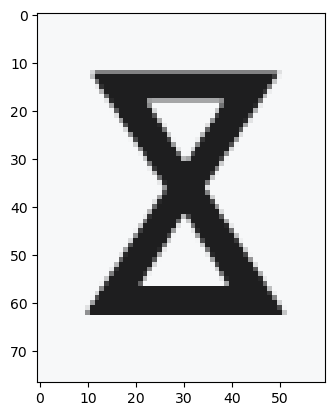

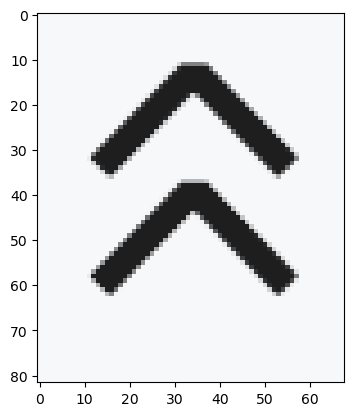

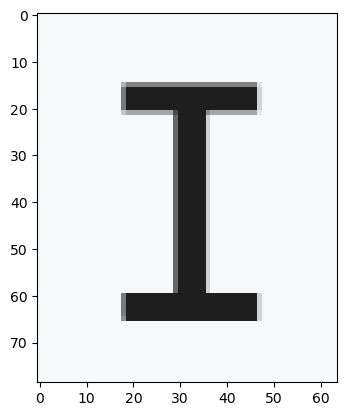

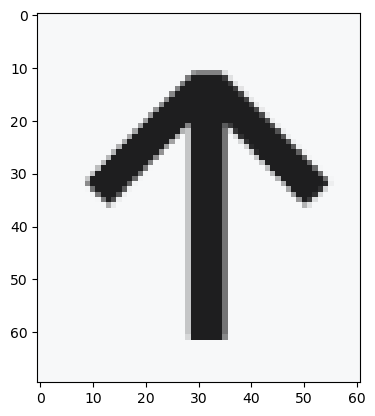

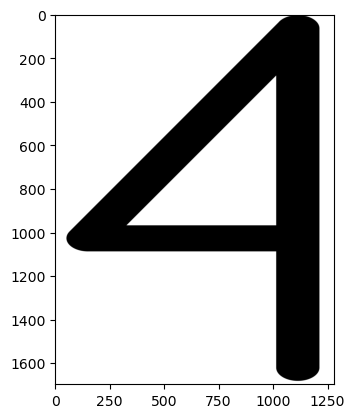

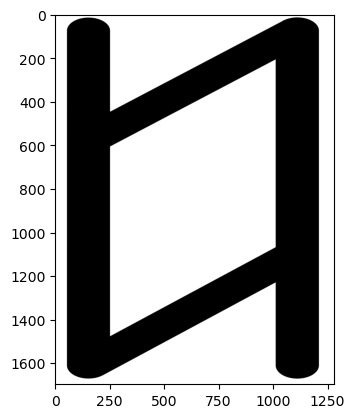

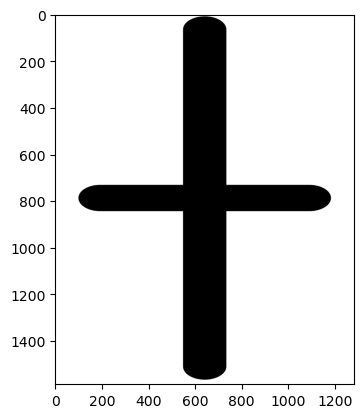

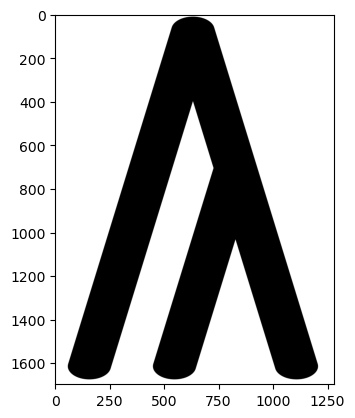

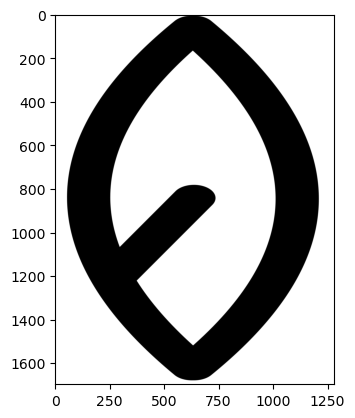

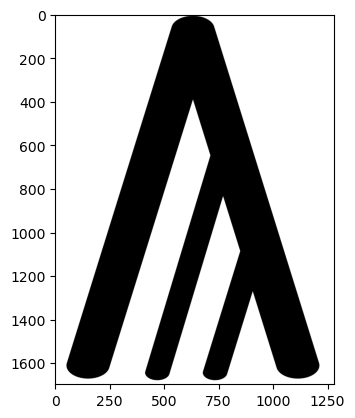

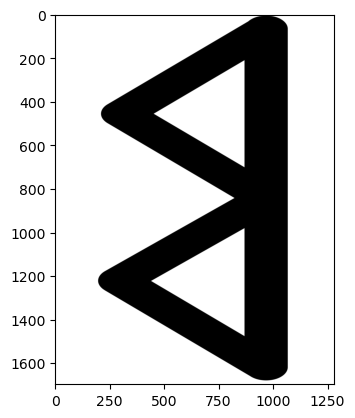

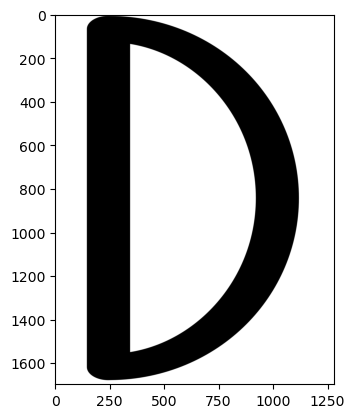

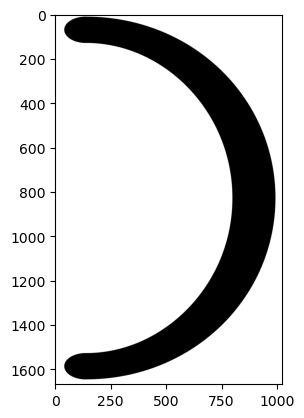

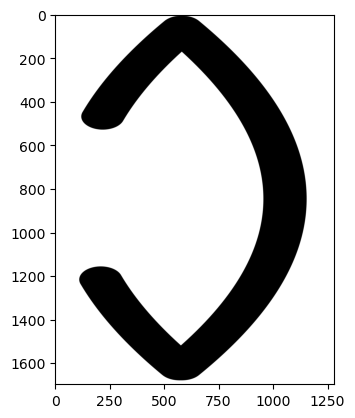

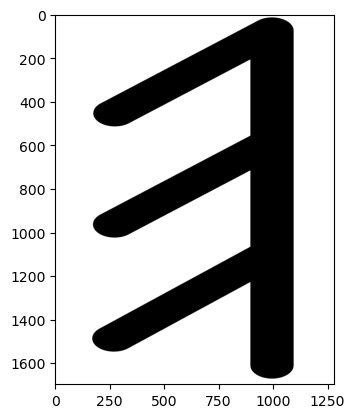

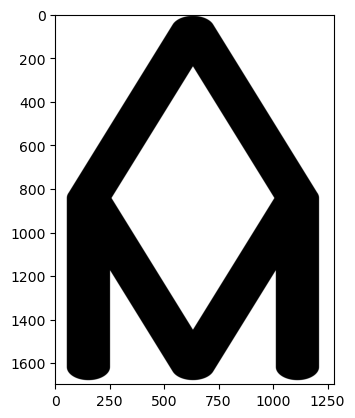

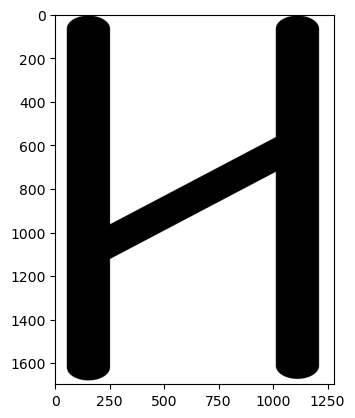

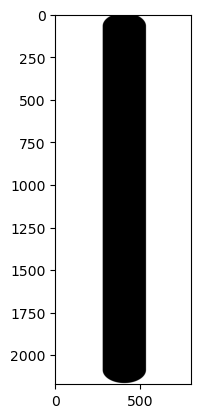

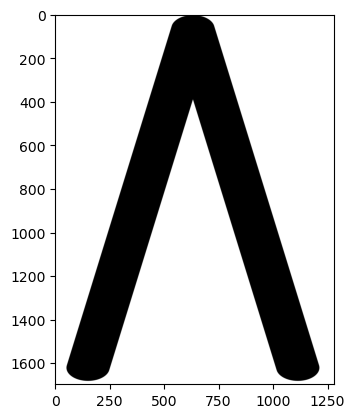

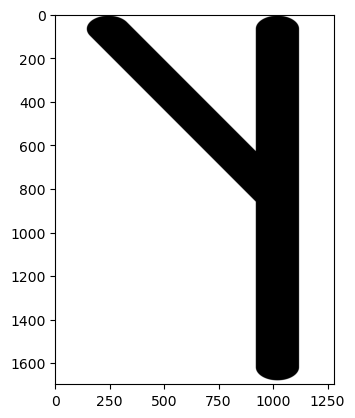

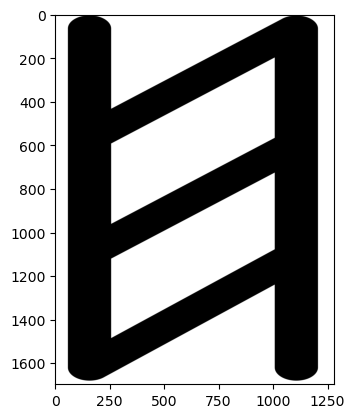

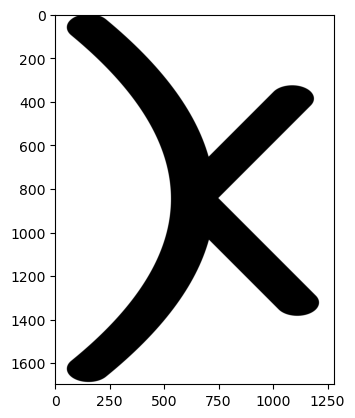

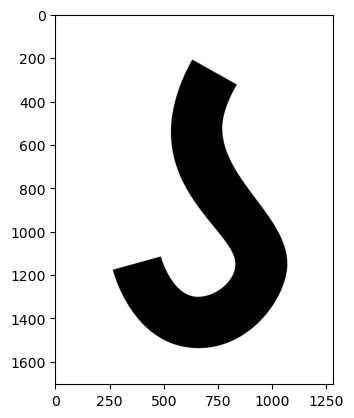

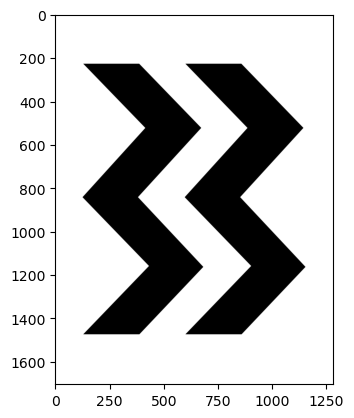

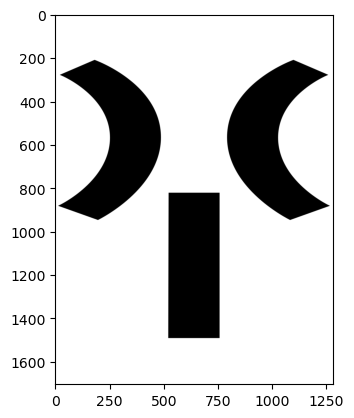

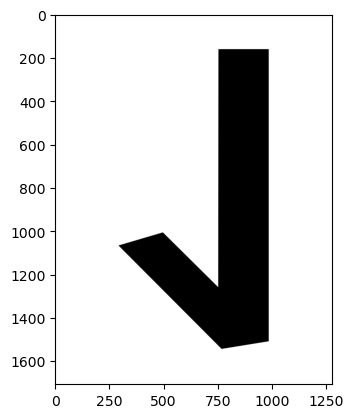

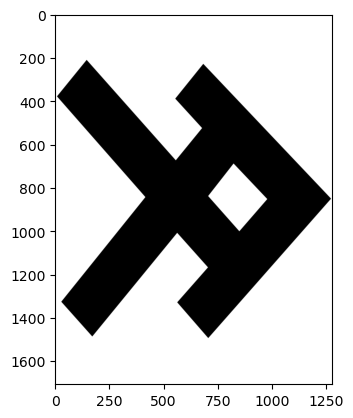

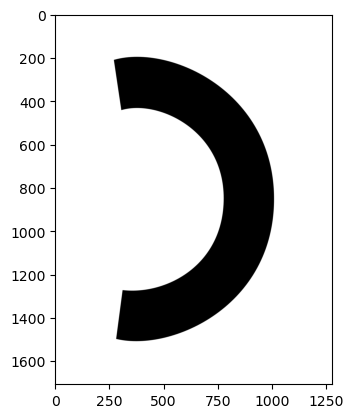

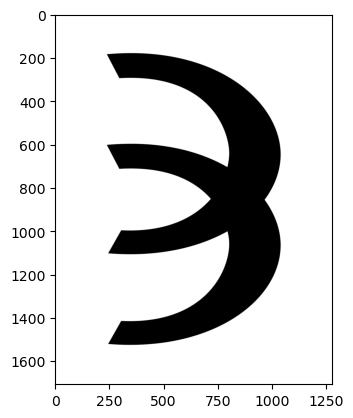

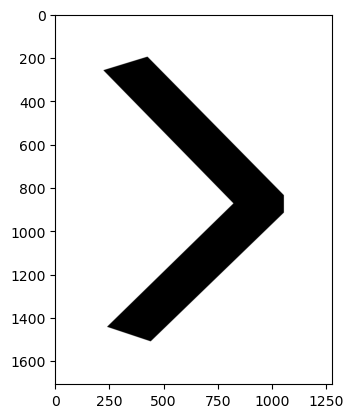

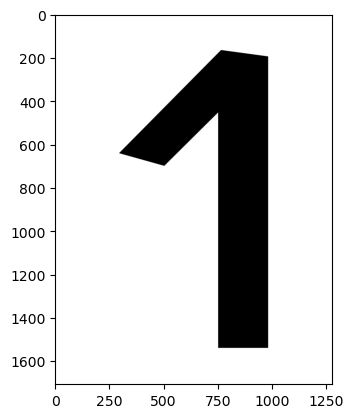

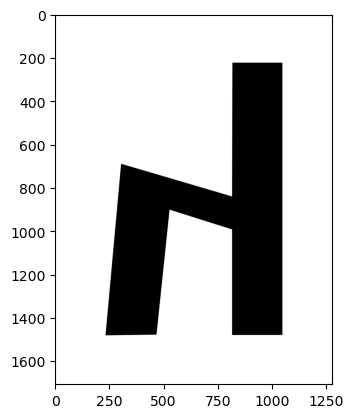

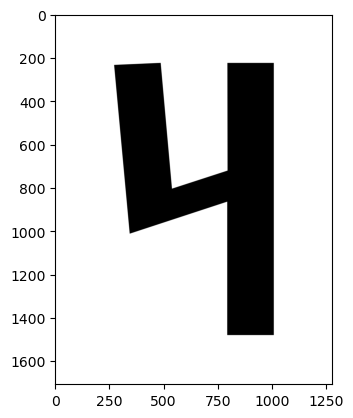

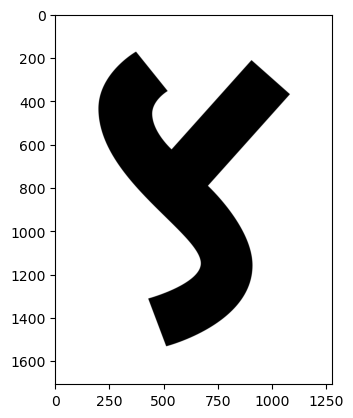

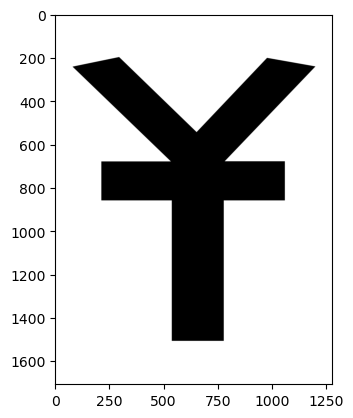

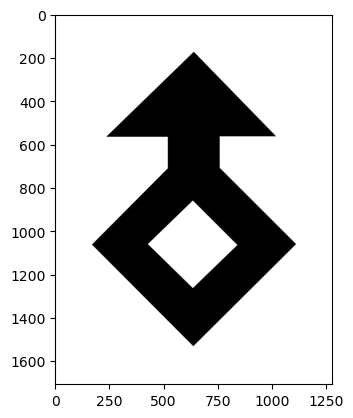

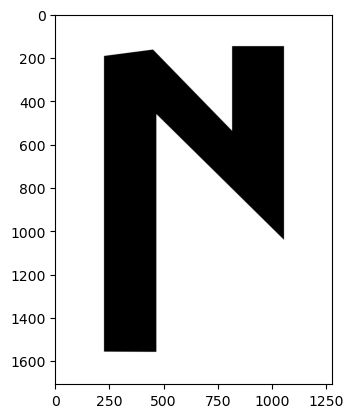

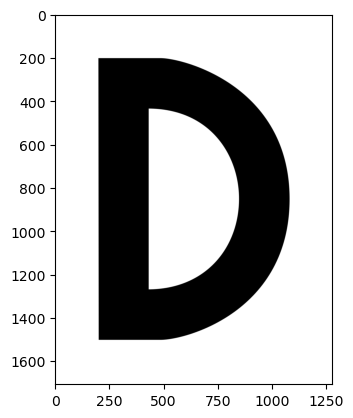

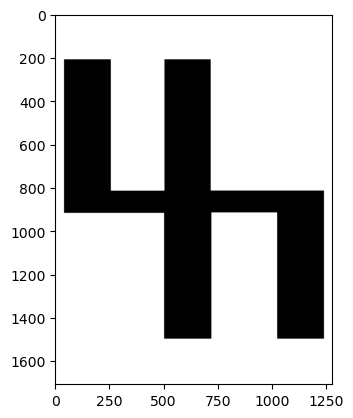

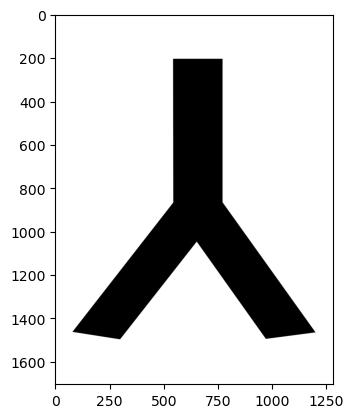

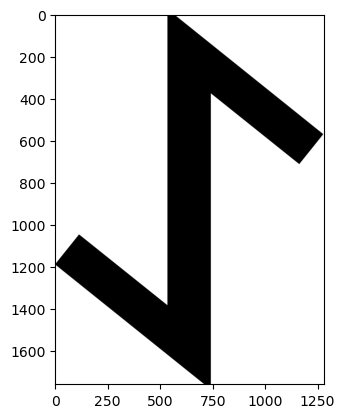

In [4]:
for d in hug:
    image = mpimg.imread(d)
    h, w, c = image.shape
    print('width:  ', w)
    print('height: ', h)
    print('channel:', c)
    plt.figure()
    plt.imshow(image)

In [283]:
def load_and_preprocess_image(path):
    # Read image from file
    path_name= os.path.join("compdata_180_1000", Path(path).parent)
    if 'old_hungarian' in path_name:
        file_name = os.path.basename(path).split('_')[0]
        ch_no=1
    elif 'old_turkic' in path_name:
        file_name = os.path.basename(path).split('_')[-1].split('.')[0]
        ch_no=3
    elif 'Carian' in path_name:
        file_name = os.path.basename(path).split('.')[0]
        file_name = file_name.replace("_", '')
        ch_no=1
    else:
        file_name=None
    image = Image.open(path)
    image = image.resize((64,64)).getchannel(ch_no).convert('RGB')
    angles = np.random.randint(0, high=180, size=1000, dtype=int)
    if os.path.exists(os.path.join(path_name, f"class_{file_name}")):
        pass
    else:
        os.makedirs(os.path.join(path_name, f"class_{file_name}"))
    for angle in angles:
        rotated_image = image.rotate(angle)
        rotated_image = rotated_image.convert("L")
        rotated_image.convert("L").save(os.path.join(os.path.join(path_name, f"class_{file_name}"), f"{file_name}_{angle}.png"))

In [284]:
for data in hug:
    try:
        image = load_and_preprocess_image(data)
        
    except:
        print(data)

Datasets\old_turkic\1280px-Old_Turkic_letter_M.png
Datasets\old_turkic\Old_Turkic_letter_Orkhon_A.png


In [221]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 8
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'compdata/Datasets/old_hungarian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'compdata/Datasets/old_hungarian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )


Found 882 images belonging to 18 classes.
Found 212 images belonging to 18 classes.


In [194]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4  # 20% of the data will be used for validation
)

train_generator = datagen.flow_from_directory(
    'compdata/Datasets/old_hungarian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'compdata/Datasets/old_hungarian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for validation data
)

test_generator = datagen.flow_from_directory(
    'compdata/Datasets/old_hungarian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 429 images belonging to 18 classes.
Found 275 images belonging to 18 classes.
Found 275 images belonging to 18 classes.


In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [222]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3811 - loss: 1.9794 - val_accuracy: 0.6875 - val_loss: 0.8845
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8750 - loss: 0.2375 - val_accuracy: 0.7500 - val_loss: 0.9217
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8903 - loss: 0.3608 - val_accuracy: 0.8413 - val_loss: 0.4440
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 1.0000 - loss: 0.0758 - val_accuracy: 0.5000 - val_loss: 0.8608
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9406 - loss: 0.1465 - val_accuracy: 0.8510 - val_loss: 0.4172
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 1.0000 - loss: 0.0217 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9345 - loss: 0.1719 - val_accuracy: 0.9471 - val_loss: 0.1288
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 1.0000 - loss: 7.3765e-04 - 

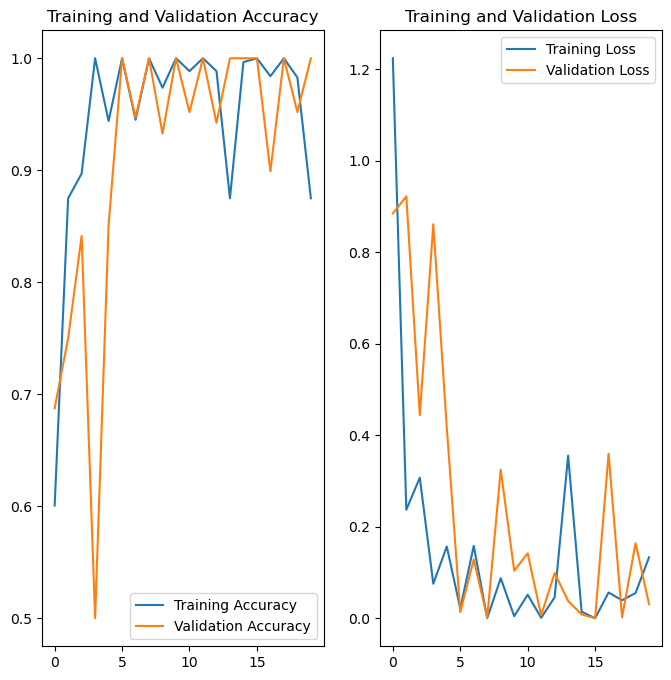

In [224]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## With 270 degree rotated samples

In [236]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 8
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'compdata/Datasets/old_hungarian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'compdata/Datasets/old_hungarian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )

Found 1237 images belonging to 18 classes.
Found 300 images belonging to 18 classes.


In [245]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer='l1',
    bias_regularizer='l1',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu', bias_regularizer='l1',activity_regularizer='l2',),
    Dense(256, activation='relu', activity_regularizer='l2',),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.1215 - loss: 4.7503 - val_accuracy: 0.3041 - val_loss: 2.7287
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.3750 - loss: 2.6100 - val_accuracy: 0.0000e+00 - val_loss: 2.7598
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3954 - loss: 2.4518 - val_accuracy: 0.6250 - val_loss: 1.8388
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.3750 - loss: 2.1012 - val_accuracy: 0.7500 - val_loss: 1.4267
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6398 - loss: 1.6898 - val_accuracy: 0.7568 - val_loss: 1.4215
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.6250 - loss: 1.2802 - val_accuracy: 0.7500 - val_loss: 0.9863
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8299 - loss: 1.2938 - val_accuracy: 0.9122 - val_loss: 1.0788
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8750 - loss: 0.9729 - 

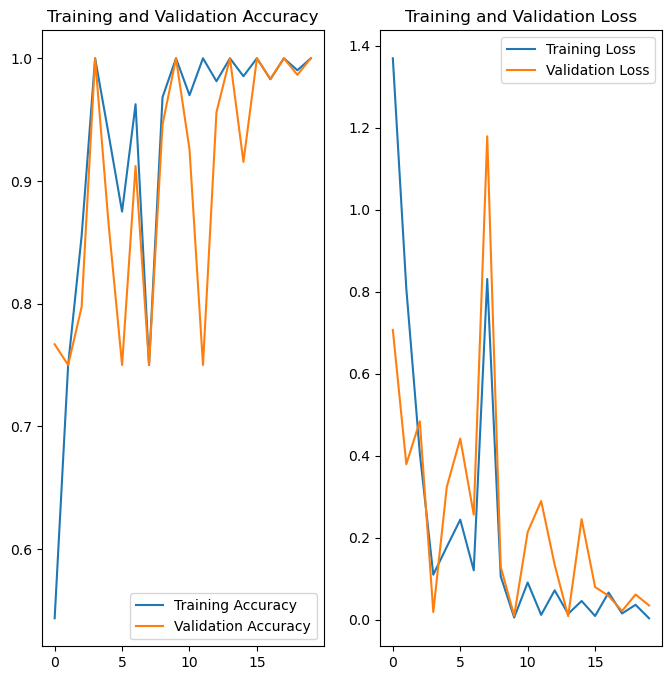

In [238]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [230]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 8
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'compdata/Datasets/Carian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'compdata/Datasets/Carian',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )

Found 2135 images belonging to 44 classes.
Found 510 images belonging to 44 classes.


In [233]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(44, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1733 - loss: 3.3404 - val_accuracy: 0.6071 - val_loss: 1.3241
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 132us/step - accuracy: 0.7500 - loss: 0.4633 - val_accuracy: 0.6667 - val_loss: 0.6098
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8708 - loss: 0.4307 - val_accuracy: 0.8750 - val_loss: 0.3906
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 150us/step - accuracy: 1.0000 - loss: 0.0440 - val_accuracy: 0.8333 - val_loss: 0.3835
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9601 - loss: 0.1355 - val_accuracy: 0.9325 - val_loss: 0.1907
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 1.0000 - loss: 0.0720 - val_accuracy: 1.0000 - val_loss: 0.0203
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9728 - loss: 0.0819 - val_accuracy: 0.9405 - val_loss: 0.1944
Epoch 8/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 114us/step - accuracy: 1.0000 - loss: 0.0107 - val_

In [270]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
original_data_dir = 'compdata3/Datasets/old_hungarian'  # Path to your original data directory
base_dir = 'data_split_old_hungarian3'  # Base directory to save the split data

# Create base directory if it does not exist
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Split dataset into training-validation and testing
trainval_dir = os.path.join(base_dir, 'trainval')
test_dir = os.path.join(base_dir, 'test')
os.mkdir(trainval_dir)
os.mkdir(test_dir)

# Move data to trainval and test directories
for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    trainval_class_dir = os.path.join(trainval_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.mkdir(trainval_class_dir)
    os.mkdir(test_class_dir)
    filenames = os.listdir(class_dir)
    trainval_filenames, test_filenames = train_test_split(filenames, test_size=0.2, random_state=42)
    for filename in trainval_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(trainval_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in test_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_class_dir, filename)
        shutil.copyfile(src, dst)

# Split training-validation set into training and validation
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(val_dir)

for class_name in os.listdir(trainval_dir):
    class_dir = os.path.join(trainval_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.mkdir(train_class_dir)
    os.mkdir(val_class_dir)
    filenames = os.listdir(class_dir)
    train_filenames, val_filenames = train_test_split(filenames, test_size=0.25, random_state=42)  # 60% train, 20% validation
    for filename in train_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in val_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_class_dir, filename)
        shutil.copyfile(src, dst)


In [262]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 8
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'data_split_old_hungarian_small/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'data_split_old_hungarian_small/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'data_split_old_hungarian_small/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 151 images belonging to 18 classes.
Found 18 images belonging to 18 classes.
Found 18 images belonging to 18 classes.


In [263]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1069 - loss: 2.9855 - val_accuracy: 0.2500 - val_loss: 2.6200
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 - loss: 2.5260 - val_accuracy: 0.0000e+00 - val_loss: 2.6524
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4348 - loss: 2.0041 - val_accuracy: 0.2500 - val_loss: 2.4765
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.6222 - val_accuracy: 0.5000 - val_loss: 1.0947
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5175 - loss: 1.4526 - val_accuracy: 0.2500 - val_loss: 2.0690
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 1.0396 - val_accuracy: 0.0000e+00 - val_loss: 2.4692
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7330 - loss: 0.8299 - val_accuracy: 0.5000 - val_loss: 2.0182
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.0580 - val_accuracy: 1.0000

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


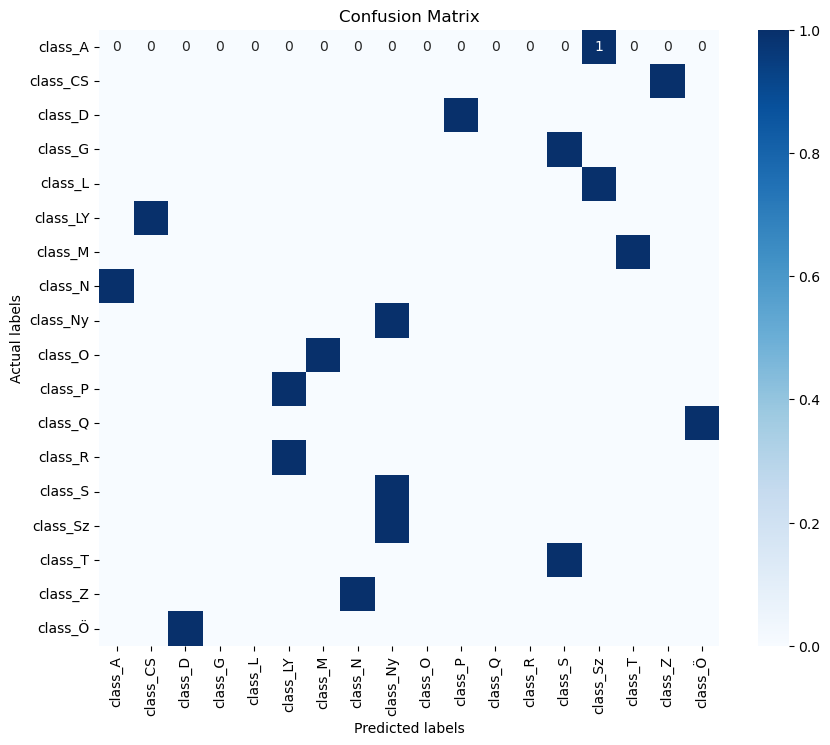

In [265]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [271]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 16
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'data_split_old_hungarian3/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'data_split_old_hungarian3/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'data_split_old_hungarian3/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 342 images belonging to 18 classes.
Found 36 images belonging to 18 classes.
Found 36 images belonging to 18 classes.


In [272]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0768 - loss: 2.9527

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2397 - loss: 2.6314 - val_accuracy: 0.7812 - val_loss: 0.8422
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.9072 - val_accuracy: 0.7500 - val_loss: 0.7382
Epoch 3/20
 1/21 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5000 - loss: 0.9682

C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7123 - loss: 0.7641 - val_accuracy: 0.8125 - val_loss: 0.6275
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.5153 - val_accuracy: 1.0000 - val_loss: 0.1945
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9117 - loss: 0.2627 - val_accuracy: 0.9375 - val_loss: 0.1827
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2080 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9069 - loss: 0.4071 - val_accuracy: 1.0000 - val_loss: 0.0965
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2670 - val_accuracy: 1.0000 - val_loss: 0.1210
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9437 - loss: 0.1488 - val_accuracy: 0.9688 - val_loss: 0.0472
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 1.0000 - val_loss: 0.008

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/stepWARNING:tensorflow:5 out of the last 46 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001CA2B87E200> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


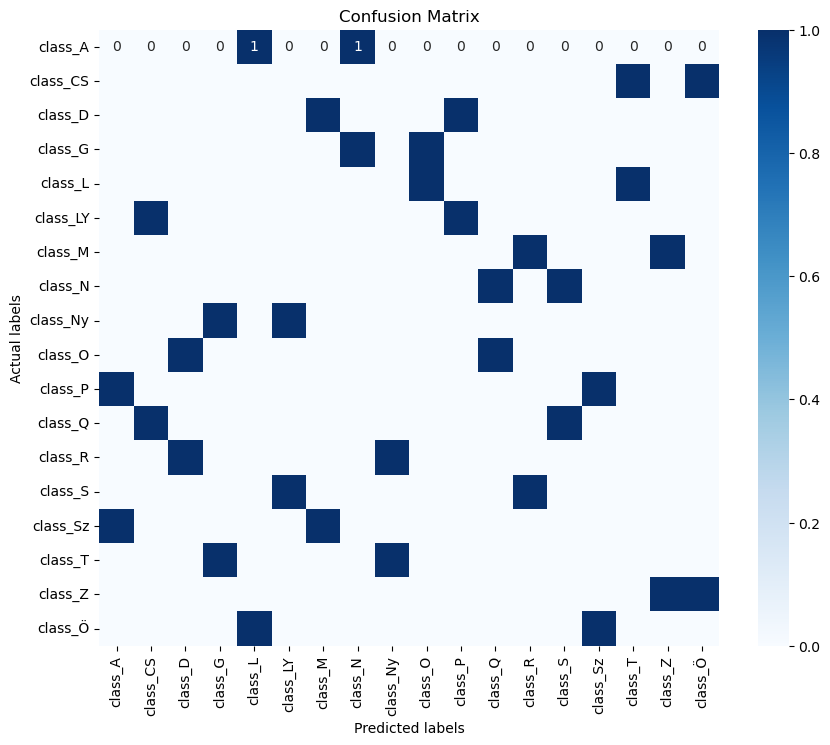

In [273]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [274]:
model.save('hung.h5')